# Object Detection and Aperture Photometry Tutorial with SEP and Astropy

This tutorial demonstrates the basic steps of using SEP (Source Extraction and Photometry) to detect objects in an image and perform aperture photometry. We'll replace the fitsio package with astropy.io.fits for reading the test image.

In [20]:
# Step 2: Import necessary libraries
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import rcParams

# Additional setup for reading the test image and displaying plots
import fitsio

# Set up matplotlib figure size
%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

# Step 2: Import Necessary Libraries

This step imports essential Python libraries, including numpy for numerical operations, sep for source extraction, astropy.io.fits for working with FITS files, matplotlib.pyplot for creating plots, matplotlib.patches for drawing ellipses, and fitsio for additional FITS file handling. The %matplotlib inline command ensures that Matplotlib plots are displayed directly in the Jupyter notebook.

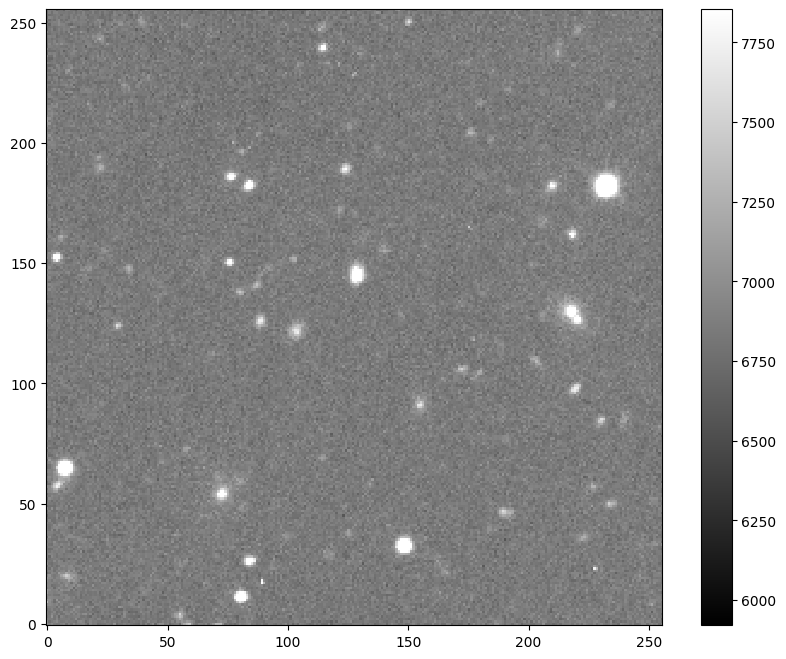

In [33]:
# Step 3: Read and Display the UDF f105w Image
# read image into standard 2-d numpy array
data = fits.getdata("Desktop/images/f105w.fits")

# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

plt.savefig("Desktop/images/105_gray.png")

# Step 3: Read and Display the UDF f105w Image

In this step, we read the UDF f105w image using Astropy's fits.getdata function, converting it into a standard 2-dimensional numpy array named 'data.' Subsequently, the image is displayed using Matplotlib's plt.imshow method, with a grayscale colormap and appropriate scaling for better visibility. The resulting colorbar provides a reference for pixel intensity. Finally, the displayed image is saved as "Desktop/images/105_gray.png."

Global Mean of Background: 6852.04931640625
Global Noise of Background: 65.46174621582031


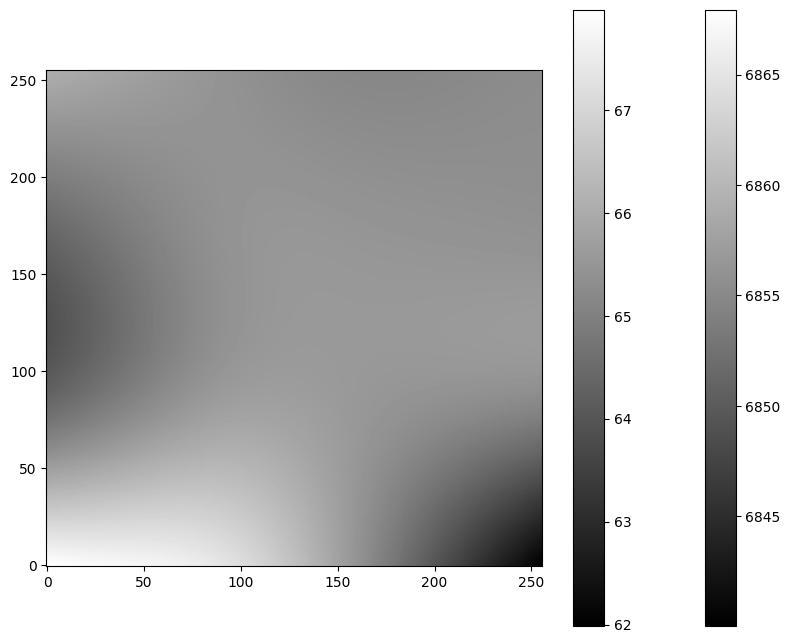

In [34]:
# Step 4: Background Subtraction
# measure a spatially varying background on the image
bkg = sep.Background(data)

# get a "global" mean and noise of the image background
print(f"Global Mean of Background: {bkg.globalback}")
print(f"Global Noise of Background: {bkg.globalrms}")

# evaluate background as 2-d array, same size as the original image
bkg_image = bkg.back()

# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

# evaluate the background noise as 2-d array, same size as the original image
bkg_rms = bkg.rms()

# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

# subtract the background
data_sub = data - bkg

plt.savefig("Desktop/images/background.png")

# Step 4: Background Subtraction

This step involves background subtraction from the f105w image. The spatially varying background is measured using the sep.Background function. The global mean and noise of the image background are printed for reference. The background is then evaluated as a 2-dimensional array (bkg_image), and both the background and its noise are visualized using Matplotlib. The resulting background-subtracted image is saved as "Desktop/images/background.png."

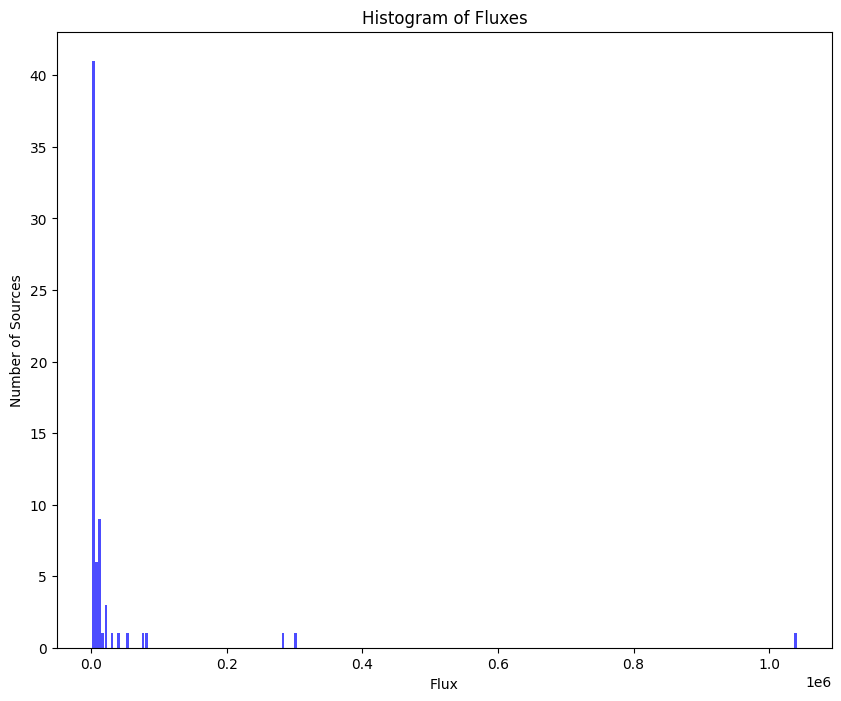

<Figure size 1000x800 with 0 Axes>

In [31]:
# Step 5: Object Detection on UDF f105w Image
# run object detection on the background-subtracted data
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# Step 6: Histogram of Fluxes
# histogram of fluxes
fluxes = objects['flux']
plt.hist(fluxes, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel('Flux')
plt.ylabel('Number of Sources')
plt.title('Histogram of Fluxes')
plt.show()

plt.savefig("Desktop/images/fluxes.png")

# Step 5: Object Detection on UDF f105w Image

Object detection is performed on the background-subtracted f105w image using SEP's extract function. Detected objects are stored in the 'objects' variable.

# Step 6: Histogram of Fluxes

A histogram of the fluxes of detected objects is created to visualize the distribution. The resulting plot shows the number of sources against their respective flux values. The plot is saved as "Desktop/images/fluxes.png."

In [24]:
# Step 7: Statistical Analysis of Flux Distribution
# Calculate mean, median, and standard deviation of flux distribution
mean_flux = np.mean(fluxes)
median_flux = np.median(fluxes)
std_dev_flux = np.std(fluxes)

# Print the results
print(f"Mean Flux: {mean_flux}")
print(f"Median Flux: {median_flux}")
print(f"Standard Deviation of Flux: {std_dev_flux}")

# Identify the largest outlier
largest_outlier_index = np.argmax(fluxes)
largest_outlier_flux = fluxes[largest_outlier_index]

# Print information about the largest outlier
print(f"Largest Outlier Flux: {largest_outlier_flux}")
print(f"Index of Largest Outlier: {largest_outlier_index}")

# Save the image showing detected objects
plt.savefig("Desktop/images/detected_objects.png")

Mean Flux: 33171.48872644761
Median Flux: 3992.491455078125
Standard Deviation of Flux: 132952.7422585187
Largest Outlier Flux: 1040899.0
Index of Largest Outlier: 53


<Figure size 1000x800 with 0 Axes>

# Step 7: Statistical Analysis of Flux Distribution

In this step, a statistical analysis of the flux distribution of detected objects is performed:

- The mean, median, and standard deviation of the fluxes are calculated using numpy functions.
- The results are printed to the console for reference.
- The largest outlier in the flux distribution is identified, and its flux value and index are printed.
- The image showing the detected objects is saved as "Desktop/images/detected_objects.png."

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


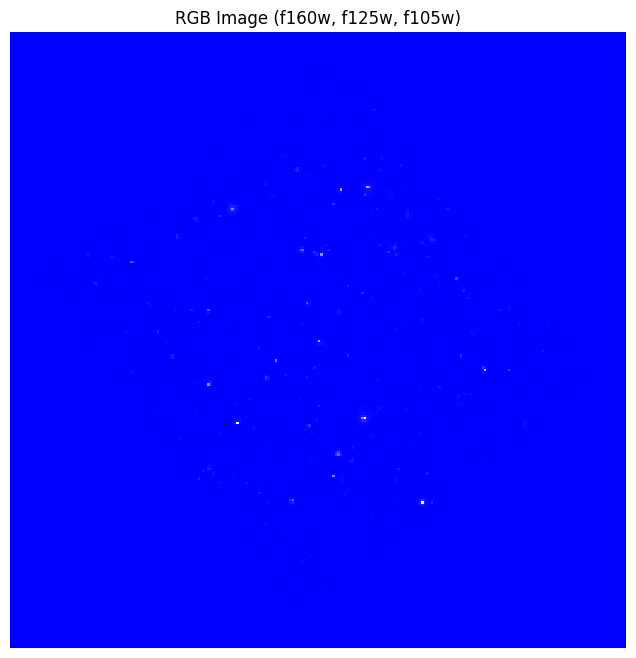

In [30]:
# Step 8: Create 3-Color False Image with f125w and f160w
# read f125w and f160w images
f125w_data = fits.getdata("Desktop/images/f125w.fits")
f160w_data = fits.getdata("Desktop/images/f160w.fits")

# Resize the f125w and f160w images to match the shape of the f105w image
from scipy.ndimage import zoom

f125w_resized = zoom(f125w_data, zoom=(data.shape[0]/f125w_data.shape[0], data.shape[1]/f125w_data.shape[1]), order=3)
f160w_resized = zoom(f160w_data, zoom=(data.shape[0]/f160w_data.shape[0], data.shape[1]/f160w_data.shape[1]), order=3)

# Create 3-color false image (RGB -> f160w, f125w, f105w)
rgb_image = np.stack([f160w_resized, f125w_resized, data], axis=-1)

# Show the 3-color image
plt.imshow(rgb_image, interpolation='nearest', origin='lower')
plt.title('RGB Image (f160w, f125w, f105w)')
plt.axis('off')

# Save the 3-color image as a PNG
plt.savefig("Desktop/images/rgb_image.png")

# Step 8: Create 3-Color False Image with f125w and f160w

In this final step, a 3-color false image is created using the f160w, f125w, and f105w images:

- The f125w and f160w images are read using Astropy's fits.getdata function.
- The f125w and f160w images are resized to match the shape of the f105w image using scipy.ndimage.zoom.
- A 3-color false image is generated by stacking the three resized images along the last axis, creating an RGB representation.
- The resulting 3-color image is displayed using Matplotlib.
- The image is saved as "Desktop/images/rgb_image.png" for further reference or sharing.